<a href="https://colab.research.google.com/github/prkhr7/prakhar-rawat/blob/master/Spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection & Pre-Processing

In [24]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv('/content/mail_data.csv')

In [25]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [26]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [27]:
# printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

Label Encoding

In [29]:
# label spam mail as 0;  ham mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

spam  -  0

ham  -  1

In [30]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

In [31]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [32]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


Splitting the data into training data & test data

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [34]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


Feature Extraction

In [35]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [36]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [37]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

Training the Model

Logistic Regression

In [38]:
model = LogisticRegression()

In [39]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

Evaluating the trained model

In [40]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [41]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9670181736594121


In [42]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [43]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9659192825112107


Building a Predictive System

In [70]:
def mail(input_mail):

# convert text to feature vectors
  input_data_features = feature_extraction.transform(input_mail)

  # making prediction

  prediction = model.predict(input_data_features)
  print(prediction)


  if (prediction[0]==1):
    return('Ham mail')

  else:
    return ('Spam mail')
input_mail = ["07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow"]
mail(input_mail)


[0]


'Spam mail'

In [45]:
x_train = [o.split(" ") for o in X_train]
x_test = [o.split(" ") for o in X_test]

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
vectorizer = TfidfVectorizer()
raw_sentences = [' '.join(o) for o in x_train]
vectorizer.fit(raw_sentences)

TfidfVectorizer()

In [48]:
def convert_to_feature(raw_tokenize_data):
    raw_sentences = [' '.join(o) for o in raw_tokenize_data]
    return vectorizer.transform(raw_sentences)

In [49]:
x_train_features = convert_to_feature(x_train)
x_test_features = convert_to_feature(x_test)

In [50]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [51]:
clf = GaussianNB()

In [52]:
clf.fit(x_train_features.toarray(),Y_train)

GaussianNB()

In [53]:
clf.score(x_test_features.toarray(),Y_test)

0.9013452914798207

In [54]:
clf.score(x_train_features.toarray(),Y_train)

0.9452546555979359

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score

In [56]:
y_predict = clf.predict(x_test_features.toarray())

In [57]:
confusion_matrix(Y_test,y_predict)

array([[140,  15],
       [ 95, 865]])

In [58]:
tn, fp, fn, tp = confusion_matrix(Y_test,y_predict).ravel()

In [59]:
print("Precision: {:.2f}%".format(100 * precision_score(Y_test, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(Y_test, y_predict)))

Precision: 98.30%
Recall: 90.10%


In [60]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [61]:
cnf_matrix = confusion_matrix(Y_test,y_predict)

In [62]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[140  15]
 [ 95 865]]


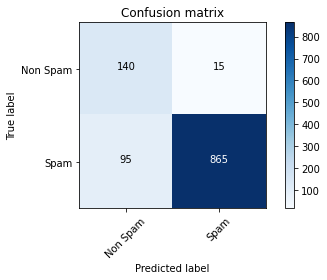

In [63]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Non Spam','Spam'], normalize=False,
                      title='Confusion matrix')

In [86]:
import requests
import json
def url1(url):


  params = {'apikey': '359f36a247d61555cd07bf868ac7c4b914e5692a365ecc6c635c51251f806433', 'resource':'https://cuchd.blackboard.com/'}

  res = requests.get(url, params=params)

  #print(response.json())
  pretty_json = json.loads(res.text)
  #print (json.dumps(pretty_json, indent=2))
  return json.dumps(pretty_json["positives"])
url = 'https://www.virustotal.com/vtapi/v2/url/report'
print(url1(url))



0


In [65]:
import hashlib
 
filename = "/content/18bcs3413worksheet 5.pdf"
with open(filename,"rb") as f:
    bytes = f.read() # read entire file as bytes
    readable_hash = hashlib.sha256(bytes).hexdigest();
    print(readable_hash)

153061891b848f93a0e5c94f47db40dbdb9be63bf8083399ec4b70b050d0f77d


In [84]:
import requests
def file1(url):
 

  params = {'apikey': '359f36a247d61555cd07bf868ac7c4b914e5692a365ecc6c635c51251f806433'}

  files = {'file': ('18bcs3413worksheet 5.pdf', open('/content/18bcs3413worksheet 5.pdf', 'rb'))}

  response = requests.post(url, files=files, params=params)

  return(response.json())
url = 'https://www.virustotal.com/vtapi/v2/file/scan'
file1(url)


{'md5': '32367d03c935c8036796df65f7d69279',
 'permalink': 'https://www.virustotal.com/gui/file/153061891b848f93a0e5c94f47db40dbdb9be63bf8083399ec4b70b050d0f77d/detection/f-153061891b848f93a0e5c94f47db40dbdb9be63bf8083399ec4b70b050d0f77d-1653560636',
 'resource': '153061891b848f93a0e5c94f47db40dbdb9be63bf8083399ec4b70b050d0f77d',
 'response_code': 1,
 'scan_id': '153061891b848f93a0e5c94f47db40dbdb9be63bf8083399ec4b70b050d0f77d-1653560636',
 'sha1': '2e301b05bbf77baf57cac6f81a6320f06071da5b',
 'sha256': '153061891b848f93a0e5c94f47db40dbdb9be63bf8083399ec4b70b050d0f77d',
 'verbose_msg': 'Scan request successfully queued, come back later for the report'}

In [88]:
import requests
def file2():
  url = 'https://www.virustotal.com/vtapi/v2/file/report'

  params = {'apikey': '359f36a247d61555cd07bf868ac7c4b914e5692a365ecc6c635c51251f806433', 'resource': '153061891b848f93a0e5c94f47db40dbdb9be63bf8083399ec4b70b050d0f77d'}

  response = requests.get(url, params=params)
  r_json = json.loads(response.text)
  return(json.dumps(r_json["scans"]["Bkav"]["detected"]))

  
print(file2())


false


In [93]:
def prediction():
  if file2()=='false' and url1(url)==0 and mail()=="Ham mail":
    return('ham mail')
  else:
    return('Spam mail')
print(prediction())





Spam mail
